In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from peak_shave_sim import PeakShaveSim
from util import process_file

FILENAME = '../data/Sub71125.csv'
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 600

batteries.py: loading battery config from batteries.yaml...
batteries.py: Loading config for LiIonBattery...
batteries.py: Loading config for Flywheel...
batteries.py: Loading config for Supercapacitor...
batteries.py: Loading config for PeakShaveLiIonBattery...
batteries.py: Loading config for PeakShaveFlywheel...
batteries.py: Loading config for PeakShaveSupercapacitor...


In [2]:
liion_cnt = 10
flywh_cnt = 10
sucap_cnt = 10
margin = .05

In [3]:
df = process_file(FILENAME)
mean_demand = df['net'].mean()
upperlim = mean_demand * (1 + margin)
lowerlim = mean_demand * (1 - margin)
config = {
    'delta_limit': 1,
    'LiIonBattery': liion_cnt,
    'Flywheel': flywh_cnt,
    'Supercapacitor': sucap_cnt
}
sim = PeakShaveSim(config, df)
# total_costs, powers = sim.run_const_limits(lowerlim, upperlim, True)

batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 10, 'Flywheel': 10, 'Supercapacitor': 10}


In [4]:
# print(f'Total costs: {total_costs}')
# powers = pd.DataFrame(powers, columns=['pnet', 'pbought', 'soc'])
# print(powers)

In [5]:
# plt.plot(range(len(powers['pnet'])), powers['pnet'], linewidth=.5)
# plt.plot(range(len(powers['pbought'])), powers['pbought'], linewidth=.5)
# plt.plot(range(len(powers['soc'])), powers['soc'], linewidth=.5)
# plt.xlim(0, 5000)
# plt.ylim(0, 400)

In [6]:
total_costs, powers = sim.run_equalized_limits(create_log=True)
print(total_costs)

Demand:     0.00 kW, Purchased:    32.17 kW, Charged:     32.17 kW, SelfD:   0.00 kW SOC:    29.60 kWh (  0.99%) Price:    0.00 Money spent:    0.00
Demand:    62.00 kW, Purchased:    54.94 kW, Discharged:   7.06 kW, SelfD:   1.18 kW SOC:    21.71 kWh (  0.72%) Price:   62.00 Money spent:   34.06
Demand:    53.40 kW, Purchased:    53.40 kW, No charge/discharge,   SelfD:   0.87 kW SOC:    20.84 kWh (  0.69%) Price:   53.40 Money spent:   28.52
Demand:    49.80 kW, Purchased:    49.80 kW, No charge/discharge,   SelfD:   0.83 kW SOC:    20.01 kWh (  0.67%) Price:   49.80 Money spent:   24.80
Demand:    53.20 kW, Purchased:    53.20 kW, No charge/discharge,   SelfD:   0.80 kW SOC:    19.21 kWh (  0.64%) Price:   53.20 Money spent:   28.30
Demand:    51.40 kW, Purchased:    51.40 kW, No charge/discharge,   SelfD:   0.77 kW SOC:    18.44 kWh (  0.61%) Price:   51.40 Money spent:   26.42
Demand:    49.80 kW, Purchased:    49.80 kW, No charge/discharge,   SelfD:   0.74 kW SOC:    17.70 kWh (  

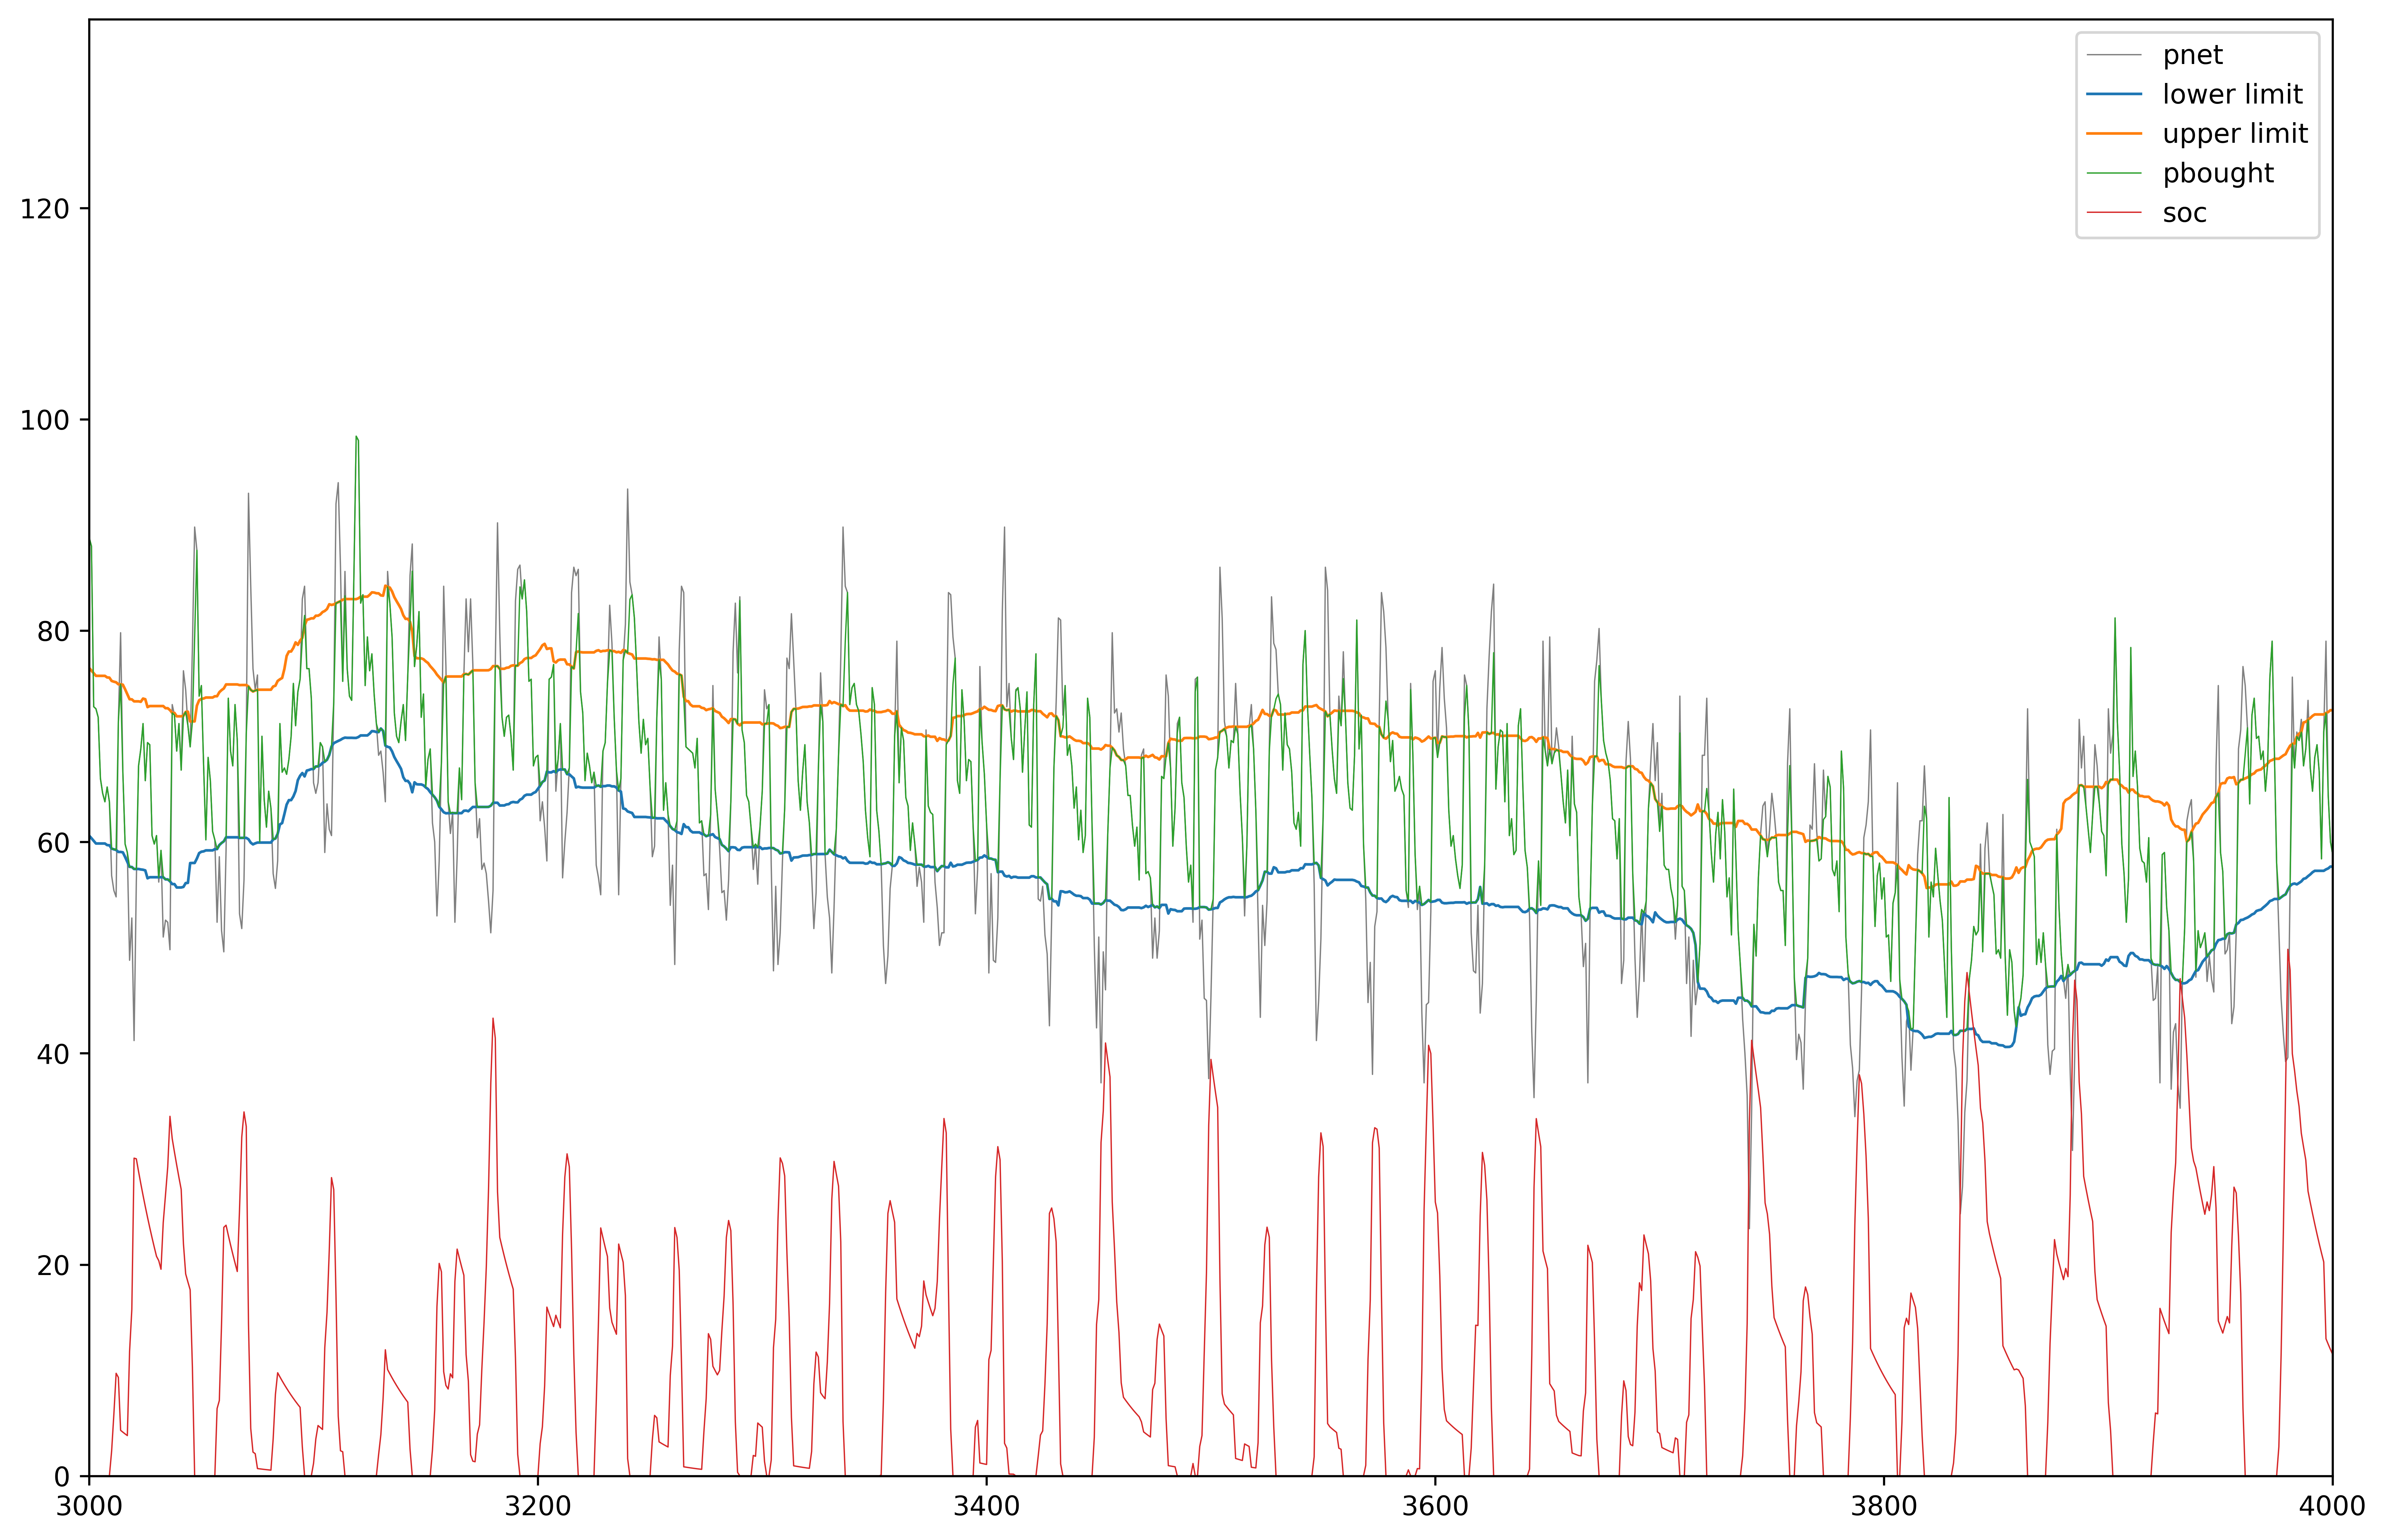

In [9]:
powers = pd.DataFrame(powers, columns=['pnet', 'lowerlim', 'upperlim', 'pbought', 'soc'])

plt.plot(range(len(powers['pnet'])), powers['pnet'], linewidth=.5, color='grey', label='pnet')
plt.plot(range(len(powers['lowerlim'])), powers['lowerlim'], linewidth=1, label='lower limit')
plt.plot(range(len(powers['upperlim'])), powers['upperlim'], linewidth=1, label='upper limit')
plt.plot(range(len(powers['pbought'])), powers['pbought'], linewidth=.5, label='pbought')
plt.plot(range(len(powers['soc'])), powers['soc'], linewidth=.5, label='soc')
plt.xlim(3000, 4000)
plt.ylim(0)
plt.legend()